In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal,integrate

plt.rcParams['font.family'] = "Microsoft YaHei"
#plt.rcParams['font.family'] = "Source Han Sans CN"

下面的 `costom_colors` 是可以自己改的，不仍都一样了(

In [3]:
%config InlineBackend.figure_format = 'retina'

custom_colors = sns.color_palette(n_colors=10)

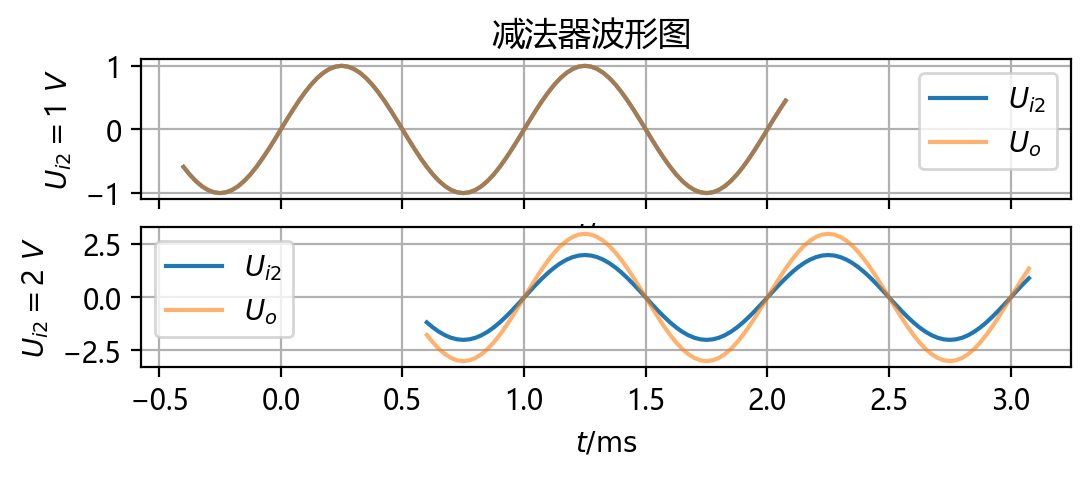

In [7]:
fig, axs = plt.subplots(2, sharex=True, figsize=(6, 2))
fig.suptitle("减法器波形图")
    
for i in range(1,3):
    t = np.linspace(0.1+i-1.5, 2.1+i-1, 100, endpoint=False)
    y1 = i * np.sin(2 * np.pi * 1 * t)
    y2 = 2 * (i-0.5) * np.sin(2 * np.pi * 1 * t)
    axs[i-1].grid()
    axs[i-1].plot(t, y1, label=r'$U_{i2}$')
    axs[i-1].plot(t, y2, label=r'$U_{o}$',alpha=0.6,color=custom_colors[1])
    axs[i-1].set(xlabel=r'$t / \rm ms$', ylabel=r'$ U_{i2} = $'+ str(i) +r'$ \  V$')
    axs[i-1].legend()

plt.savefig("减法器波形图.png",dpi=300)
plt.show()

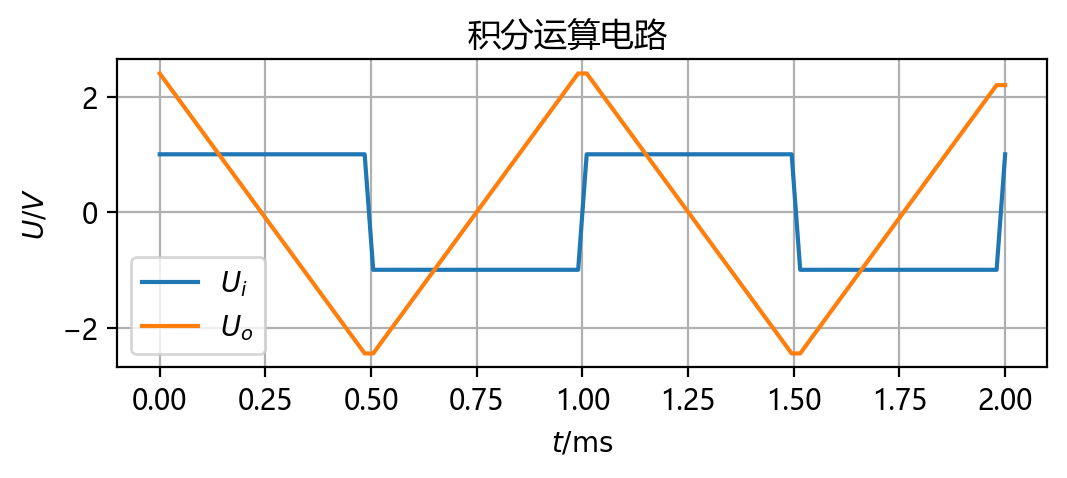

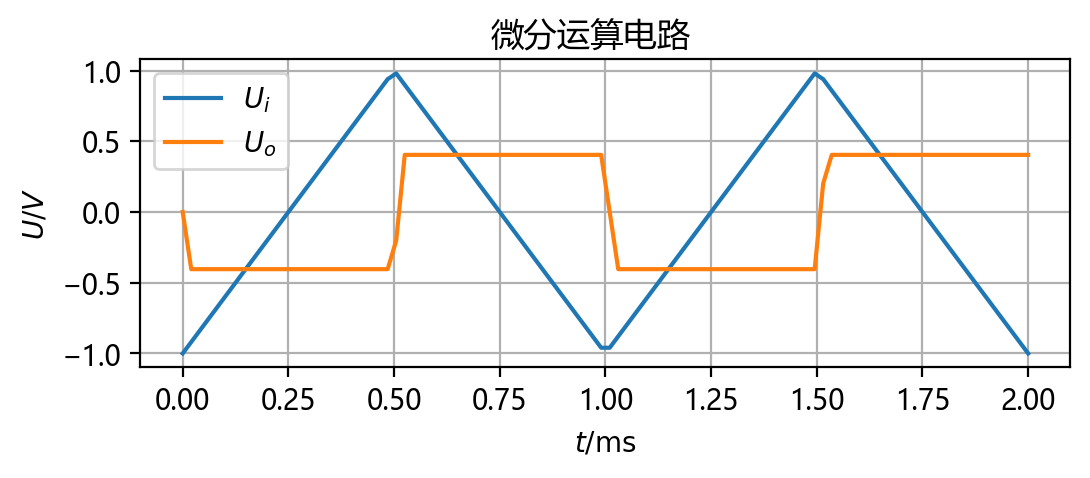

In [5]:
strs = ["积分运算电路","微分运算电路"]

for i in range(0,2):
    fig, axs = plt.subplots(figsize=(6, 2))
    fig.suptitle(strs[i])
    t = np.linspace(0, 2, 100)
    if i == 0:
        square_wave = signal.square(2 * np.pi * 1 * t)
        processed = -10 * integrate.cumtrapz(square_wave, t, initial=0) + 2.4
    else:
        square_wave = 1 * signal.sawtooth(2 * np.pi * 1 * t,0.5)
        processed = -0.1* 50 * np.diff(square_wave, prepend=square_wave[0])
    axs.grid()
    axs.plot(t, square_wave, label=r'$U_{i}$')
    axs.plot(t, processed, label=r'$U_{o}$',color=custom_colors[1])
    axs.set(xlabel=r'$t / \rm ms$', ylabel=r'$ U / V$')
    axs.legend()
    plt.savefig(strs[i]+".png",dpi=300)
    plt.show()
